## SIEĆ KOMUNIKACYJNA LONDYNU

Graf reprezentujący rzeczywisty układ sieci komunikacyjnej w Londynie. Pod uwagę brane są 3 środki transportu: DLR, Underground i Overground, każdemu odpowiada kolor (zgodny z kolorem logo reprezentującym dany środek). Niektóre węzły posiadają więcej niż jeden typ połączenia, co również zostało zaprezentowane na grafie (wierzchołki na siebie nachodzące to ta sama stacja). Dla zachowania czytelności nazwy stacji nie zostały dodane.

In [84]:
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.colors import ListedColormap
import numpy as np
import pandas as pd

# wczytanie danych
ldn_edges = pd.read_csv("/Users/Karolina/Desktop/uni/3_semestr/TWD/DunalKarolina/network/edges.csv")
ldn_nodes = pd.read_csv("/Users/Karolina/Desktop/uni/3_semestr/TWD/DunalKarolina/network/nodes.csv")

,# index,name,nodeLabel,nodeLat,nodeLong,_pos
0,0,abbeyroad,abbeyroad,51.531952,0.003738,"array([1.67398194, 6.84895367])"
1,1,westham,westham,51.528526,0.005332,"array([1.69016166, 6.8574384 ])"
2,2,actoncentral,actoncentral,51.508758,-0.263416,"array([1.92309925, 7.34721208])"
3,3,willesdenjunction,willesdenjunction,51.532234,-0.243895,"array([1.89444118, 7.329156 ])"
4,4,actontown,actontown,51.503071,-0.280288,"array([2.03649598, 7.40223207])"
5,5,chiswickpark,chiswickpark,51.494371,-0.267723,"array([2.02276546, 7.38930105])"
6,6,turnhamgreen,turnhamgreen,51.495182,-0.254510,"array([2.00971376, 7.37258541])"
7,7,aldgate,aldgate,51.514342,-0.075613,"array([1.76081381, 7.01147356])"
8,8,liverpoolstreet,liverpoolstreet,51.517598,-0.082235,"array([1.74786392, 7.00898463])"
9,9,aldgateeast,aldgateeast,51.515082,-0.072987,"array([1.74974394, 6.99030793])"


In [183]:

node_labels = ldn_nodes.set_index("# index")[" nodeLabel"].to_dict()
ldn_nodes[' _pos'] = ldn_nodes[' _pos'].str.strip('array([])')  
ldn_nodes[['x_pos', 'y_pos']] = ldn_nodes[' _pos'].str.split(', ', expand=True) 

ldn_graph = nx.Graph()
ldn_graph1 = nx.Graph()
ldn_graph2 = nx.Graph()
ldn_graph3 = nx.Graph()

for _, row in ldn_edges.iterrows():
    if row[' layer'] == 1:
        ldn_graph1.add_edge(row['# source'], row[' target'], layer=row[' layer'], weight=row[' weight'])
    if row[' layer'] == 2:
        ldn_graph2.add_edge(row['# source'], row[' target'], layer=row[' layer'], weight=row[' weight'])
    if row[' layer'] == 3:
        ldn_graph3.add_edge(row['# source'], row[' target'], layer=row[' layer'], weight=row[' weight'])

# ustawienie pozycji wierzchołków dla każdego grafu
pos1 = {node: (float(row['x_pos']), float(row['y_pos'])) for node, row in ldn_nodes.iterrows()}
pos2 = {node: (float(row['x_pos'])- 0.005, float(row['y_pos']) - 0.005) for node, row in ldn_nodes.iterrows()}
pos3 = {node: (float(row['x_pos']) + 0.005, float(row['y_pos']) + 0.005) for node, row in ldn_nodes.iterrows()}

print(node_labels)


{0: 'abbeyroad', 1: 'westham', 2: 'actoncentral', 3: 'willesdenjunction', 4: 'actontown', 5: 'chiswickpark', 6: 'turnhamgreen', 7: 'aldgate', 8: 'liverpoolstreet', 9: 'aldgateeast', 10: 'whitechapel', 11: 'allsaints', 12: 'poplar', 13: 'alperton', 14: 'parkroyal', 15: 'amersham', 16: 'chalfont&latimer', 17: 'anerley', 18: 'norwoodjunction', 19: 'angel', 20: 'oldstreet', 21: 'archway', 22: 'tufnellpark', 23: 'arnosgrove', 24: 'southgate', 25: 'arsenal', 26: 'finsburypark', 27: 'bakerstreet', 28: 'bondstreet', 29: 'edgwareroad(circleline)', 30: 'greatportlandstreet', 31: 'regentspark', 32: 'balham', 33: 'tootingbec', 34: 'bank', 35: 'londonbridge', 36: 'shadwell', 37: 'barbican', 38: 'farringdon', 39: 'moorgate', 40: 'barking', 41: 'upney', 42: 'barkingside', 43: 'fairlop', 44: 'baronscourt', 45: 'earlscourt', 46: 'westkensington', 47: 'bayswater', 48: 'nottinghillgate', 49: 'paddington', 50: 'becktonpark', 51: 'cyprus', 52: 'becontree', 53: 'dagenhamheathway', 54: 'belsizepark', 55: 'ch

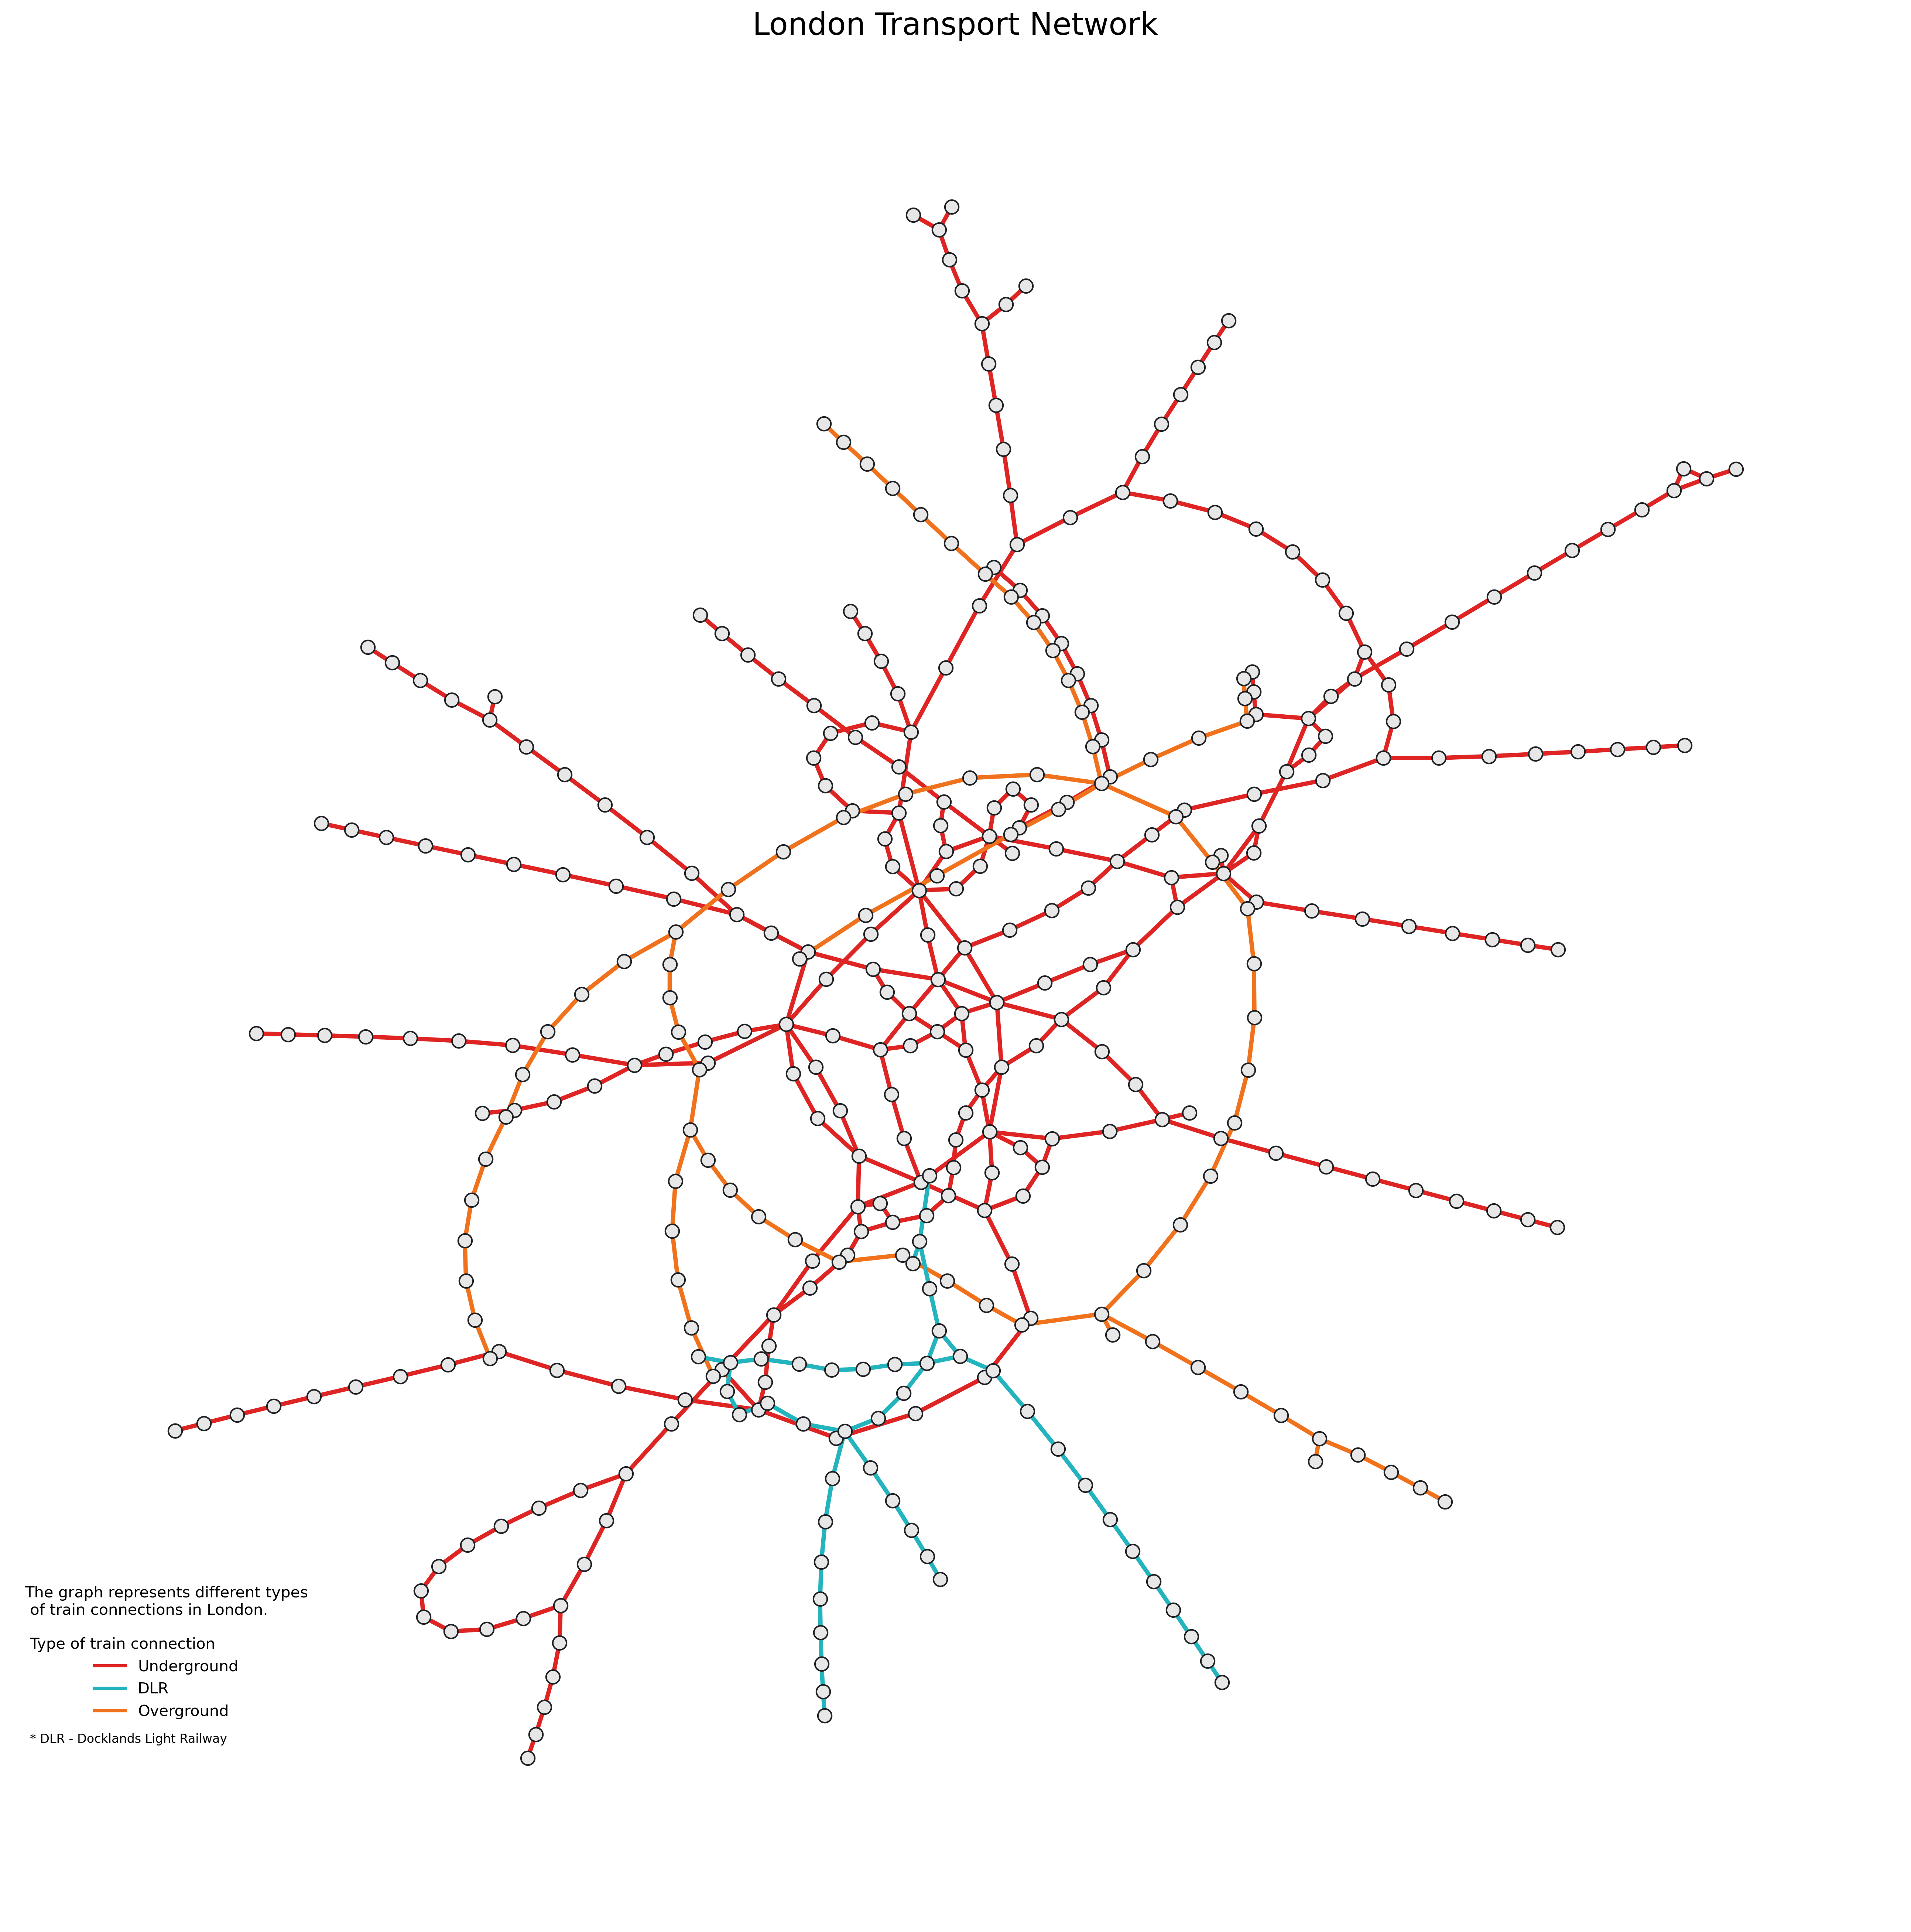

In [191]:
fig, ax = plt.subplots(1, 1, figsize=(22, 22), dpi = 300)
ax.set_title("London Transport Network", fontsize=20)

nx.draw_networkx_edges(ldn_graph1, pos1, ax=ax, edge_color='#df2424', width=2.8, label='Underground')
nx.draw_networkx_edges(ldn_graph2, pos2, ax=ax, edge_color='#f1721d', width=2.8, label='Overground')
nx.draw_networkx_edges(ldn_graph3, pos3, ax=ax, edge_color='#24b4be', width=2.8, label='DLR')


nx.draw_networkx_nodes(ldn_graph1, pos1, ax=ax, node_color='#e7e7e7', node_size=80, edgecolors='#202124')
nx.draw_networkx_nodes(ldn_graph2, pos2, ax=ax, node_color='#e7e7e7', node_size=80, edgecolors='#202124')
nx.draw_networkx_nodes(ldn_graph3, pos3, ax=ax, node_color='#e7e7e7', node_size=80, edgecolors='#202124')
# kolory odpowiadają kolorom w logo danego środka transportu

# nx.draw_networkx_labels(ldn_graph, pos1, labels=node_labels, font_size=9, font_color='black', ax=ax, verticalalignment='bottom', horizontalalignment='center')
# dla zachowania czytelności nazwy stacji nie są dodawane


# legenda
legend_elements = [plt.Line2D([0], [0], color='#df2424', lw=2, label='Underground'),
                   plt.Line2D([0], [0], color='#24b4be', lw=2, label='DLR'),
                   plt.Line2D([0], [0], color='#f1721d', lw=2, label='Overground')]

ax.legend(title="The graph represents different types\n of train connections in London.\n\n Type of train connection", frameon=False, handles=legend_elements, bbox_to_anchor=(0, 0.1), loc="lower left")
ax.text(0.01, 0.1,
        """* DLR - Docklands Light Railway """,
        fontsize=8,
        transform=ax.transAxes,
        verticalalignment="top")

plt.axis("off")
plt.show()

#fig.savefig('LondonNetwork.png', dpi=300, bbox_inches='tight')